# Obtaining Important Features 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/data.csv')
data.drop('Unnamed: 32', axis=1, inplace = True)
data.drop('id',axis=1,inplace=True)
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [3]:
data['diagnosis'] = data.diagnosis.map({'M':1,'B':0})
X = data.iloc[:,1:]
y = data.iloc[:,0]


In [4]:
X.head(2)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
y.head(2)

0    1
1    1
Name: diagnosis, dtype: int64

In [4]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.07388044 0.01646986 0.0410595  0.04787898 0.00944422 0.02990124
 0.03535466 0.09648469 0.00796763 0.00647571 0.02057102 0.005476
 0.01948255 0.02918393 0.0062444  0.00898756 0.00969017 0.01246212
 0.00614753 0.00722419 0.10626483 0.02979123 0.08401148 0.07071122
 0.01577375 0.03230733 0.03940396 0.102427   0.01779765 0.01112515]


plot graph of feature importances for better visualization

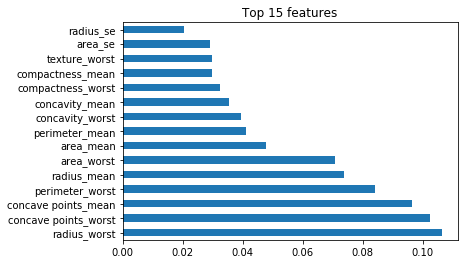

In [5]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 features')
plt.show()

In [7]:
feat_importances.nlargest(15)

radius_worst            0.106265
concave points_worst    0.102427
concave points_mean     0.096485
perimeter_worst         0.084011
radius_mean             0.073880
area_worst              0.070711
area_mean               0.047879
perimeter_mean          0.041059
concavity_worst         0.039404
concavity_mean          0.035355
compactness_worst       0.032307
compactness_mean        0.029901
texture_worst           0.029791
area_se                 0.029184
radius_se               0.020571
dtype: float64

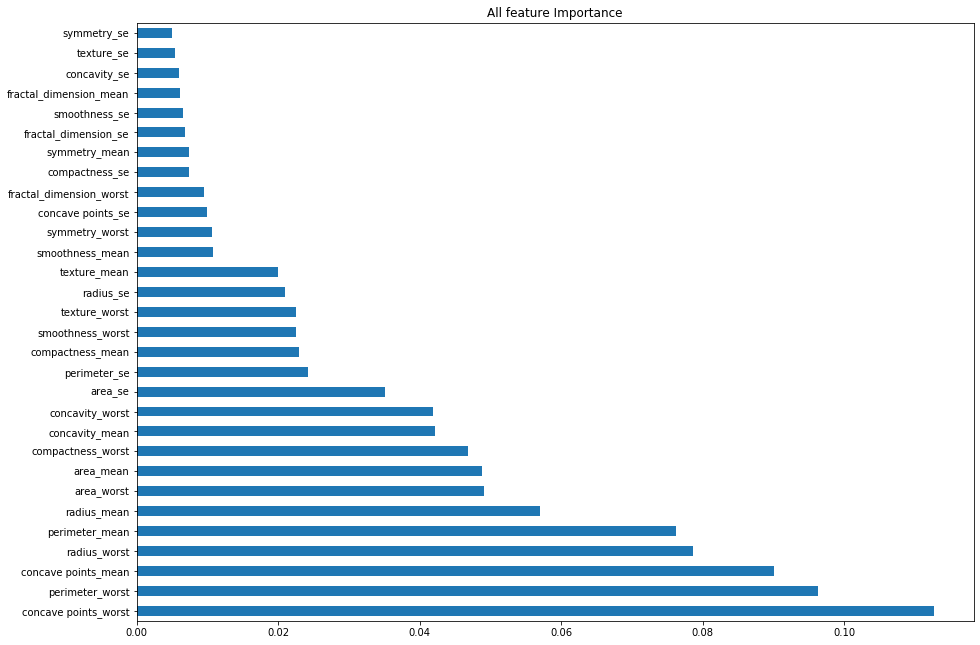

In [13]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

feat_importances.nlargest(30).plot(kind='barh', figsize=(15,11))
plt.title('All feature Importance')
plt.show()

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [15]:
classifier.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00508236, 0.        , 0.0073794 , 0.        ,
       0.        , 0.        , 0.        , 0.01759705, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02376271,
       0.01197349, 0.07673751, 0.68588894, 0.00665925, 0.05713838,
       0.        , 0.        , 0.07702027, 0.01728774, 0.01347288])

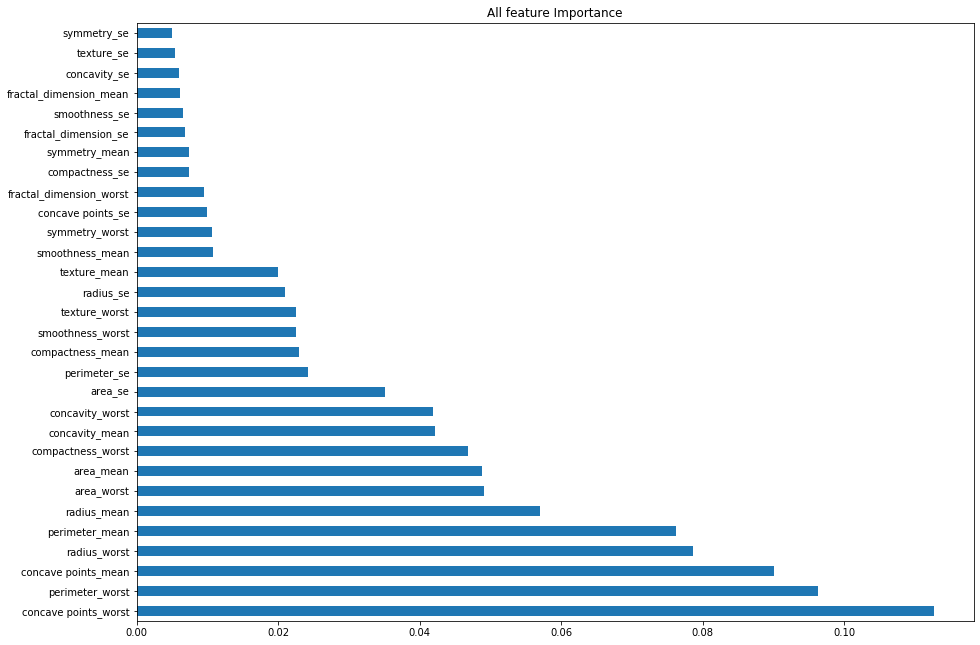

In [16]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh', figsize=(15,11))
plt.title('All feature Importance')
plt.show()

In [23]:

def get_feature_importance(models:list, X:pd.DataFrame,y:pd.Series ):
    for model_name in models:
        model = model_name()
        model.fit(X,y)
        feat_importances = pd.Series(model.feature_importances_, index=X.columns)
        feat_importances.nlargest(15).plot(kind='barh', figsize=(12,9))
        plt.title(f'Top 15 features for {model_name}')
        plt.show()
        

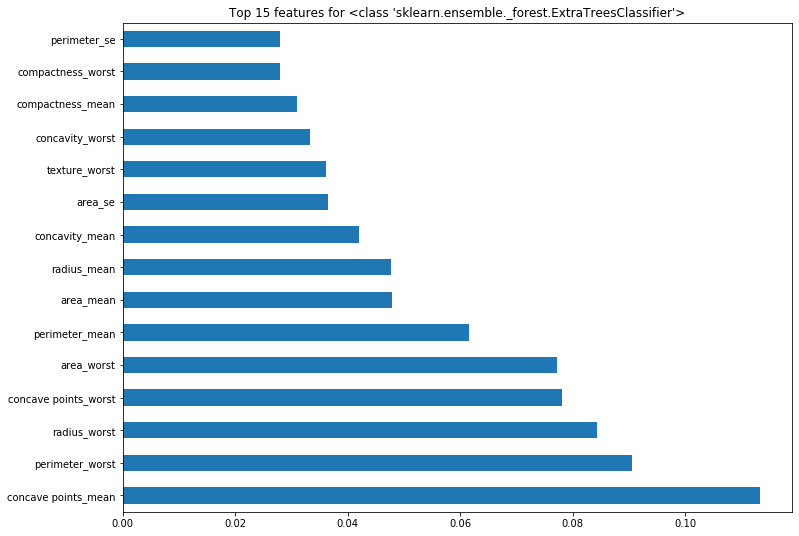

In [24]:
get_feature_importance([ExtraTreesClassifier],X=X,y=y)